# Week 1: Introduction to data analysis and advanced NumPy

> This notebook is mostly taken from https://github.com/alan-turing-institute/rse-course/tree/main/module03_research_data_in_python. Some parts are taken from or inspired by https://numpy.org/doc/stable/user/whatisnumpy.html#whatisnumpy

`NumPy` is the Python core library for numerical computing. At its core lies the `ndarray` object, which defines a multidimensional (*n*-dimensional) array of homogeneous data types. Here are some specific features of `NumPy` arrays that you should know:
- They have a fixed size, differently from Python lists.
- The elements in a `NumPy` array are all required to be of the same data type, and thus will be the same size in memory. The exception: one can have arrays of (Python, including `NumPy`) objects, thereby allowing for arrays of different sized elements.
- NumPy arrays allow to perform most computations **much faster and more efficiently** than Python's built-in sequences.
- The shape must be “rectangular”, not “jagged”; e.g., each row of a two-dimensional array must have the same number of columns.

> **N.B.:** Remember:
> - NumPy arrays are zero-indexed.
> - Most operations are vectorized (no loops needed).
> - In this notebook, with the term "array" we will refer to the `ndarray` object.

We will now start by importing `NumPy`.

In [ ]:
import numpy as np

*Estimated time to complete this notebook: 20 minutes*

## 1.1 Limitations of Python Lists

The normal Python List is just one dimensional.
To make a matrix, we have to nest Python lists:

In [1]:
x = [list(range(5)) for N in range(5)]

In [2]:
x

[[0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4]]

In [3]:
x[2][2]

2

Applying an operation to every element is a pain:

In [4]:
x + 5

TypeError: can only concatenate list (not "int") to list

In [5]:
[[elem + 5 for elem in row] for row in x]

[[5, 6, 7, 8, 9],
 [5, 6, 7, 8, 9],
 [5, 6, 7, 8, 9],
 [5, 6, 7, 8, 9],
 [5, 6, 7, 8, 9]]

Common useful operations like transposing a matrix or reshaping a 10 by 10 matrix into a 20 by 5 matrix are not easy to code in raw Python lists.

## 1.2 The NumPy array

NumPy's array type represents a multidimensional matrix $M_{i,j,k...n}$

To create an array (an `ndarray` object), we use the `array()` function.
The NumPy array seems at first to be just like a list:

In [ ]:
# import numpy as np

my_array = np.array(range(5))

In [7]:
my_array

array([0, 1, 2, 3, 4])

In [8]:
my_array[2]

np.int64(2)

In [9]:
for element in my_array:
    print("Hello" * element)


Hello
HelloHello
HelloHelloHello
HelloHelloHelloHello


Of course, you can also initialize the Numpy array from a list:

In [18]:
a = np.array([0, 1, 2, 3, 4])
a

array([0, 1, 2, 3, 4])

There are several ways of initializing NumPy arrays. Here, we will show some of them. Keep in mind that they can also be initialized from a tuple or any array-like Python object. You can look up the NumPy documentation for further information on this.
Here, we introduce `np.zeros()`, which creates arrays filled with 0s. The same logic applies to `np.ones()`, creating an array filled with 1s, and `np.empty()`, creating an empty array. 

In [ ]:
# How np.zeros() works:

zeros_array = np.zeros(2)
zeros_array

array([0., 0.])

In [ ]:
# How np.ones() works:

ones_array = np.ones(2)
ones_array

array([1., 1.])

In [ ]:
# How np.empty() works:

empty_array = np.empty(2)
empty_array # The values may vary

array([1., 1.])

Now back to lists! We can also see our first weakness of NumPy arrays versus Python lists:

In [10]:
my_array.append(4)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

For NumPy arrays, you typically don't change the data size once you've defined your array, whereas for Python lists, you can do this efficiently.
However, you get back lots of goodies in return...

> **N.B.:** 
> While you cannot change the data size of an array, it is totally possible to modify its elements.


## 1.3 Elementwise Operations

But most operations can be applied element-wise automatically!

In [11]:
my_array + 2

array([2, 3, 4, 5, 6])

These "vectorized" operations are very fast: (see [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit) for more information on the `%%timeit` magic)

In [12]:
import numpy as np

big_list = range(10000)
big_array = np.arange(10000)

In [ ]:
%%timeit # Returns the time necessary to compute the operation specified below.
[x**2 for x in big_list] # x**2 raises to the power of 2 each element x in big_list

262 μs ± 781 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [14]:
%%timeit
big_array**2

2.45 μs ± 38.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## 1.4 Arange and linspace

NumPy has two easy methods for defining floating-point evenly spaced arrays:

In [16]:
x = np.arange(0, 10, 0.1)  # Start, stop, step size
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

Note that using non-integer step size does not work with Python lists:

In [16]:
y = list(range(0, 10, 0.1))

TypeError: 'float' object cannot be interpreted as an integer

Similarly, we can quickly an evenly spaced range of a known size (e.g. for graph plotting):

In [17]:
import math

values = np.linspace(0, math.pi, 100)  # Start, stop, number of steps

In [18]:
values

array([0.        , 0.03173326, 0.06346652, 0.09519978, 0.12693304,
       0.1586663 , 0.19039955, 0.22213281, 0.25386607, 0.28559933,
       0.31733259, 0.34906585, 0.38079911, 0.41253237, 0.44426563,
       0.47599889, 0.50773215, 0.53946541, 0.57119866, 0.60293192,
       0.63466518, 0.66639844, 0.6981317 , 0.72986496, 0.76159822,
       0.79333148, 0.82506474, 0.856798  , 0.88853126, 0.92026451,
       0.95199777, 0.98373103, 1.01546429, 1.04719755, 1.07893081,
       1.11066407, 1.14239733, 1.17413059, 1.20586385, 1.23759711,
       1.26933037, 1.30106362, 1.33279688, 1.36453014, 1.3962634 ,
       1.42799666, 1.45972992, 1.49146318, 1.52319644, 1.5549297 ,
       1.58666296, 1.61839622, 1.65012947, 1.68186273, 1.71359599,
       1.74532925, 1.77706251, 1.80879577, 1.84052903, 1.87226229,
       1.90399555, 1.93572881, 1.96746207, 1.99919533, 2.03092858,
       2.06266184, 2.0943951 , 2.12612836, 2.15786162, 2.18959488,
       2.22132814, 2.2530614 , 2.28479466, 2.31652792, 2.34826

NumPy comes with 'vectorised' versions of common functions which work element-by-element when applied to arrays:

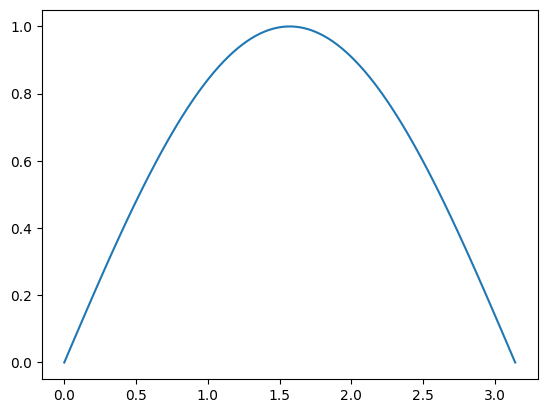

In [19]:
from matplotlib import pyplot as plt

plt.plot(values, np.sin(values))

So we don't have to use awkward list comprehensions when using these.

## 1.5 Multi-Dimensional Arrays

NumPy's true power comes from multi-dimensional arrays:

In [ ]:
np.zeros([3, 4, 2])  # 3 arrays with 4 rows and 2 columns each (bidimensional arrays!)

array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]])

Unlike a list-of-lists in Python, we can reshape arrays:

> **N.B.**:
> Keep in mind: you can modify arrays, but you **cannot** modify their size, which is defined when you initialize them. While you cannot change the amount of elements an array has, you can change the way those elements are organized. For example, you can add axes, or convert a 1d-array into a 2d-array, as we will see in the rest of this notebook.

In [21]:
x = np.array(range(40))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [22]:
y = x.reshape([4, 5, 2])  # 4 Arrays - 5 Rows - 2 Columns
y

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9]],

       [[10, 11],
        [12, 13],
        [14, 15],
        [16, 17],
        [18, 19]],

       [[20, 21],
        [22, 23],
        [24, 25],
        [26, 27],
        [28, 29]],

       [[30, 31],
        [32, 33],
        [34, 35],
        [36, 37],
        [38, 39]]])

And index multiple columns at once:

In [23]:
y[3, 2, 1]

np.int64(35)

Including selecting on inner axes while taking all from the outermost:

In [24]:
y[:, 2, 1]

array([ 5, 15, 25, 35])

And subselecting ranges:

In [25]:
y[2:, :1, :]  # Last 2 axes, 1st row, all columns

array([[[20, 21]],

       [[30, 31]]])

And [transpose](https://en.wikipedia.org/wiki/Transpose) arrays:

In [26]:
y.transpose()

array([[[ 0, 10, 20, 30],
        [ 2, 12, 22, 32],
        [ 4, 14, 24, 34],
        [ 6, 16, 26, 36],
        [ 8, 18, 28, 38]],

       [[ 1, 11, 21, 31],
        [ 3, 13, 23, 33],
        [ 5, 15, 25, 35],
        [ 7, 17, 27, 37],
        [ 9, 19, 29, 39]]])

You can get the dimensions of an array with `shape`

In [27]:
y.shape  # 4 Arrays - 5 Rows - 2 Columns

(4, 5, 2)

In [28]:
y.transpose().shape  # 2 Arrays - 5 Rows - 4 Columns

(2, 5, 4)

Some numpy functions apply by default to the whole array, but can be chosen to act only on certain axes:

In [29]:
x = np.arange(12).reshape(4, 3)
x

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [30]:
x.mean(1)  # Mean along the second axis, leaving the first.

array([ 1.,  4.,  7., 10.])

In [31]:
x.mean(0)  # Mean along the first axis, leaving the second.

array([4.5, 5.5, 6.5])

In [32]:
x.mean()  # mean of all axes

np.float64(5.5)

## 1.6 Array Datatypes

A Python `list` can contain data of mixed type:

In [33]:
x = ["hello", 2, 3.4]

In [34]:
type(x[2])

float

In [35]:
type(x[1])

int

A NumPy array always contains just one datatype:

In [36]:
np.array(x)

array(['hello', '2', '3.4'], dtype='<U32')

NumPy will choose the least-generic-possible datatype that can contain the data:

In [37]:
y = np.array([2, 3.4])

In [38]:
y

array([2. , 3.4])

You can access the array's `dtype`, or check the type of individual elements:

In [39]:
y.dtype

dtype('float64')

In [40]:
type(y[0])

numpy.float64

In [41]:
z = np.array([3, 4, 5])
z

array([3, 4, 5])

In [42]:
type(z[0])

numpy.int64

The results are, when you get to know them, fairly obvious string codes for datatypes: 
    NumPy supports all kinds of datatypes beyond the python basics.

NumPy will convert python type names to dtypes:

In [34]:
x = [2, 3.6, 7.2, 0]

In [35]:
int_array = np.array(x, dtype=int)

In [36]:
int_array

array([2, 3, 7, 0])

In [37]:
int_array.dtype

dtype('int64')

In [38]:
float_array = np.array(x, dtype=float)

In [39]:
float_array

array([2. , 3.6, 7.2, 0. ])

In [40]:
float_array.dtype

dtype('float64')